## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

pd.set_option('display.max_columns', None)

## Import Data

In [2]:
data = pd.read_excel('uas.xlsx')
data

,Bulan,Hari,Kecepatan Angin(knot),Penyinaran Matahari(persen),Tekana Udara(mb),Cura Hujan(mm3),maks kelembapan udara(persen),min kelembapan udara(persen),ratarata kelembapan udara(persen),maks suhu udara(celsius),min suhu udara(celsius),ratarata suhu udara(celsius),penghujan
0,Januari,29.0,8.8,46.0,1007.4,400.7,97.0,56.0,83.0,34.7,23.9,27.5,1
1,Februari,24.0,9.5,51.0,1006.1,257.6,97.0,51.0,82.0,33.8,23.7,27.7,1
2,Maret,24.0,7.0,55.0,1007.9,193.8,98.0,55.0,81.0,34.0,23.0,27.9,1
3,April,21.0,6.5,64.0,1007.9,283.2,96.0,56.0,81.0,33.4,24.0,28.2,1
4,Mei,10.0,7.5,91.0,1008.8,75.6,93.0,46.0,75.0,34.0,23.0,28.6,1
5,Juni,16.0,8.0,75.0,1008.6,53.0,97.0,46.0,77.0,33.0,22.4,27.9,1
6,Juli,3.0,7.0,88.0,1011.2,39.8,94.0,46.0,74.0,32.6,21.3,27.5,0
7,Agustus,0.0,8.3,96.0,1010.6,0.0,90.0,42.0,71.0,32.6,20.7,27.3,0
8,September,1.0,8.5,88.0,1010.4,0.3,89.0,28.0,69.0,35.1,21.5,28.3,0
9,Oktober,3.0,7.7,49.0,1006.0,83.3,90.0,40.0,69.0,35.9,24.0,29.8,0


### Cek Data

In [3]:
data.shape

(12, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bulan                              12 non-null     object 
 1   Hari                               12 non-null     float64
 2   Kecepatan Angin(knot)              12 non-null     float64
 3   Penyinaran Matahari(persen)        12 non-null     float64
 4   Tekana Udara(mb)                   12 non-null     float64
 5   Cura Hujan(mm3)                    12 non-null     float64
 6   maks kelembapan udara(persen)      12 non-null     float64
 7   min kelembapan udara(persen)       12 non-null     float64
 8   ratarata kelembapan udara(persen)  12 non-null     float64
 9   maks suhu udara(celsius)           12 non-null     float64
 10  min suhu udara(celsius)            12 non-null     float64
 11  ratarata suhu udara(celsius)       12 non-null     float64
 

## Data Cleaning

In [5]:
data.isnull().sum()

Bulan                                0
Hari                                 0
Kecepatan Angin(knot)                0
Penyinaran Matahari(persen)          0
Tekana Udara(mb)                     0
Cura Hujan(mm3)                      0
maks kelembapan udara(persen)        0
min kelembapan udara(persen)         0
ratarata kelembapan udara(persen)    0
maks suhu udara(celsius)             0
min suhu udara(celsius)              0
ratarata suhu udara(celsius)         0
penghujan                            0
dtype: int64

In [6]:
## merubah nama kolom
data.rename(columns={'Bulan':'Month',
                     'Hari':'DayRain',
                     'Kecepatan Angin(knot)':'WindSpeed',
                     'Penyinaran Matahari(persen)':'Sunshine',
                     'Tekana Udara(mb)':'Pressure',
                     'Cura Hujan(mm3)':'Rainfall',
                     'maks kelembapan udara(persen)':'MaxHumidity',
                     'min kelembapan udara(persen)':'MinHumidity',
                     'ratarata kelembapan udara(persen)':'Humidity',
                     'maks suhu udara(celsius)':'MaxTemp',
                     'min suhu udara(celsius)':'MinTemp',
                     'ratarata suhu udara(celsius)':'Temp',
                     'penghujan':'Rainy'}, inplace=True)

In [7]:
data

,Month,DayRain,WindSpeed,Sunshine,Pressure,Rainfall,MaxHumidity,MinHumidity,Humidity,MaxTemp,MinTemp,Temp,Rainy
0,Januari,29.0,8.8,46.0,1007.4,400.7,97.0,56.0,83.0,34.7,23.9,27.5,1
1,Februari,24.0,9.5,51.0,1006.1,257.6,97.0,51.0,82.0,33.8,23.7,27.7,1
2,Maret,24.0,7.0,55.0,1007.9,193.8,98.0,55.0,81.0,34.0,23.0,27.9,1
3,April,21.0,6.5,64.0,1007.9,283.2,96.0,56.0,81.0,33.4,24.0,28.2,1
4,Mei,10.0,7.5,91.0,1008.8,75.6,93.0,46.0,75.0,34.0,23.0,28.6,1
5,Juni,16.0,8.0,75.0,1008.6,53.0,97.0,46.0,77.0,33.0,22.4,27.9,1
6,Juli,3.0,7.0,88.0,1011.2,39.8,94.0,46.0,74.0,32.6,21.3,27.5,0
7,Agustus,0.0,8.3,96.0,1010.6,0.0,90.0,42.0,71.0,32.6,20.7,27.3,0
8,September,1.0,8.5,88.0,1010.4,0.3,89.0,28.0,69.0,35.1,21.5,28.3,0
9,Oktober,3.0,7.7,49.0,1006.0,83.3,90.0,40.0,69.0,35.9,24.0,29.8,0


## Data Exploration

### Intensitas Curah Hujan Tiap Bulan

In [8]:
rainfalmonth = data[['Rainfall', 'Month']].groupby(['Month'], as_index=False).agg({'Rainfall':'mean'})

In [9]:
rainfalmonth

,Month,Rainfall
0,Agustus,0.0
1,April,283.2
2,Desember,427.3
3,Februari,257.6
4,Januari,400.7
5,Juli,39.8
6,Juni,53.0
7,Maret,193.8
8,Mei,75.6
9,November,309.2


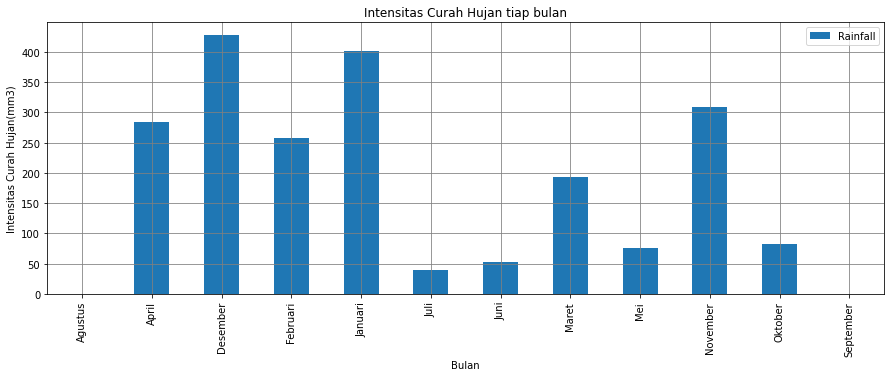

In [10]:
rainfalmonth.plot(kind='bar', x='Month', y='Rainfall', figsize=(15,5))

plt.title('Intensitas Curah Hujan tiap bulan')
plt.xlabel('Bulan')
plt.ylabel('Intensitas Curah Hujan(mm3)')
plt.grid(color="grey")

plt.show()

Berdasarkan plot diatas diketahui:
   1. Curah hujan tertinggi terjadi pada Bulan Desember dan Januari
   2. Curah hujan terendah terjadi pada Bulan Agustus dan September

### Kecepatan Angin tiap Bulan

In [11]:
wind = data[['WindSpeed', 'Month']].groupby(['Month'], as_index=False).agg({'WindSpeed':'mean'})

In [12]:
wind

,Month,WindSpeed
0,Agustus,8.3
1,April,6.5
2,Desember,7.7
3,Februari,9.5
4,Januari,8.8
5,Juli,7.0
6,Juni,8.0
7,Maret,7.0
8,Mei,7.5
9,November,7.0


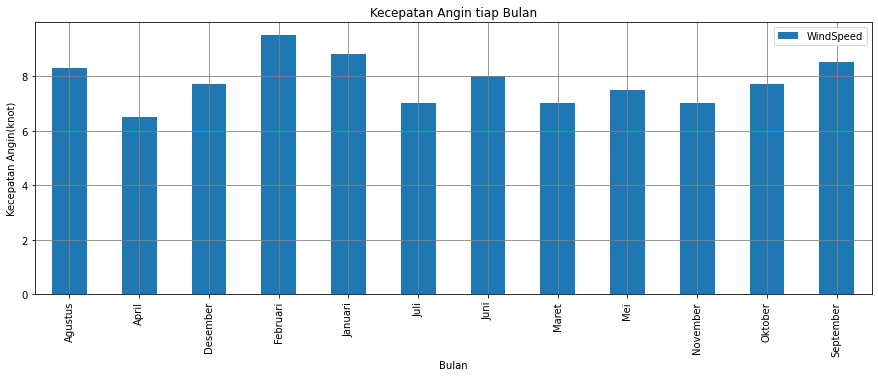

In [13]:
wind.plot(kind='bar', x='Month', y='WindSpeed', figsize=(15,5))

plt.title('Kecepatan Angin tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kecepatan Angin(knot)')
plt.grid(color="grey")

plt.show()

Berdasarkan plot diatas diketahui:
   1. Kecepatan angin paling tinggi terjadi pada bulan Februari sebesar 9.5 knot
   2. Kecepatan angin paling rendah terjadi pada bulan April sebesar 6.5 knot

### Perbandingan Suhu Maksimal dan Minimal tiap bulan

In [14]:
Temperatur = data[['MaxTemp', 'MinTemp', 'Month']].groupby(['Month'],as_index=False).agg({'MinTemp':'mean','MaxTemp':'mean'})

In [15]:
Temperatur

,Month,MinTemp,MaxTemp
0,Agustus,20.7,32.6
1,April,24.0,33.4
2,Desember,23.1,34.7
3,Februari,23.7,33.8
4,Januari,23.9,34.7
5,Juli,21.3,32.6
6,Juni,22.4,33.0
7,Maret,23.0,34.0
8,Mei,23.0,34.0
9,November,26.7,34.8


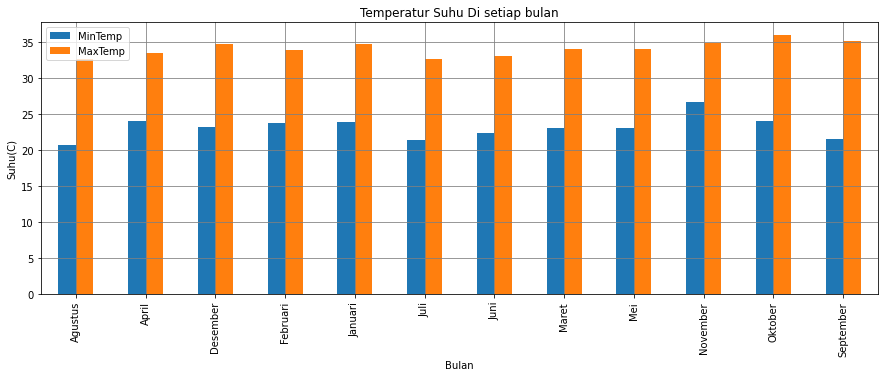

In [16]:
Temperatur.plot(kind='bar',x='Month', figsize=(15,5))

plt.title('Temperatur Suhu Di setiap bulan')
plt.xlabel('Bulan')
plt.ylabel('Suhu(C)')
plt.grid(color="grey")

plt.show()

Berdasarkan plot diatas diketahui:
   1. Suhu Terendah terjadi pada bulan Agustus sebesar 20.7 C
   2. Suhu Tertinggi terjadi pada bulan Oktober sebesar 35.9 C

### Rata-rata suhu tiap bulan

In [17]:
TemperaturMean = data[['Temp', 'Month']].groupby(['Month'], as_index=False).agg({'Temp':'mean'})

In [18]:
TemperaturMean

,Month,Temp
0,Agustus,27.3
1,April,28.2
2,Desember,28.0
3,Februari,27.7
4,Januari,27.5
5,Juli,27.5
6,Juni,27.9
7,Maret,27.9
8,Mei,28.6
9,November,28.2


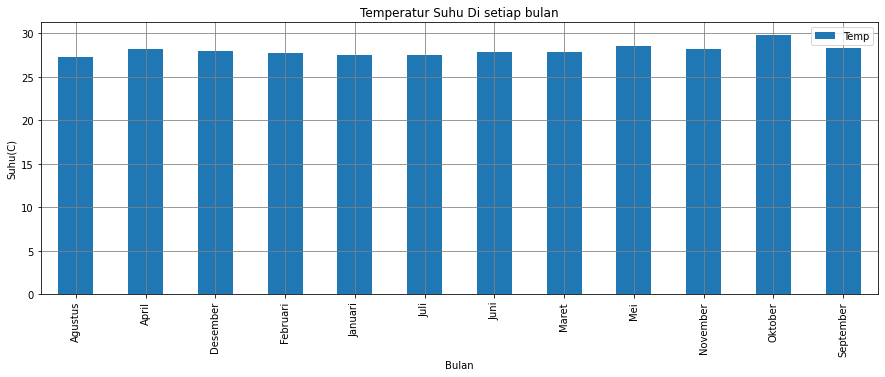

In [19]:
TemperaturMean.plot(kind='bar',x='Month', figsize=(15,5))

plt.title('Temperatur Suhu Di setiap bulan')
plt.xlabel('Bulan')
plt.ylabel('Suhu(C)')
plt.grid(color="grey")

plt.show()

Berdasarkan plot diatas diketahui bahwa sepanjang tahun 2017 rata-rata suhu berkisar dari 27 C - 30 C

## Data Preporecessing

### Cek Korelasi Data

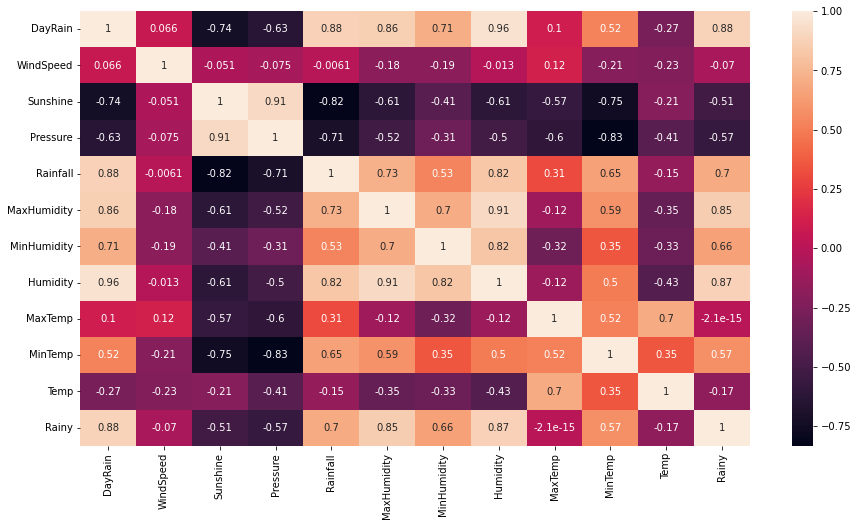

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Merubah Data Menjadi Numerik

In [21]:
le = preprocessing.LabelEncoder()

In [22]:
data[['Month']] = data[['Month']].apply(le.fit_transform)

In [23]:
x = data.drop(['Rainy'], axis=1)
y = data['Rainy']

print(x)
print(y)

    Month  DayRain  WindSpeed  Sunshine  Pressure  Rainfall  MaxHumidity  \
0       4     29.0        8.8      46.0    1007.4     400.7         97.0   
1       3     24.0        9.5      51.0    1006.1     257.6         97.0   
2       7     24.0        7.0      55.0    1007.9     193.8         98.0   
3       1     21.0        6.5      64.0    1007.9     283.2         96.0   
4       8     10.0        7.5      91.0    1008.8      75.6         93.0   
5       6     16.0        8.0      75.0    1008.6      53.0         97.0   
6       5      3.0        7.0      88.0    1011.2      39.8         94.0   
7       0      0.0        8.3      96.0    1010.6       0.0         90.0   
8      11      1.0        8.5      88.0    1010.4       0.3         89.0   
9      10      3.0        7.7      49.0    1006.0      83.3         90.0   
10      9     17.0        7.0      49.0    1006.0     309.2         99.0   
11      2     26.0        7.7      46.0    1006.4     427.3         97.0   

    MinHumi

### Membagi data menjadi data train dan test

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

## Pendefinisian Model 

### SVM

In [26]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(x_train,y_train)

SVC(kernel='linear')

In [27]:
svc_pred = SVM_model.predict(x_test)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [28]:
importance=SVM_model.coef_[0]
sorted_index=np.argsort(importance)
labels=x.columns[sorted_index]
data_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
data_importance=data_importance.sort_values(by=['Feature Importance'], ascending=False)
data_importance

,Feature Name,Feature Importance
11,MaxHumidity,0.422161
10,DayRain,0.322897
9,Humidity,0.277929
8,Month,0.151538
7,MinHumidity,0.120716
6,MinTemp,0.075424
5,Rainfall,0.038745
4,WindSpeed,-0.022260
3,Pressure,-0.053635
2,Sunshine,-0.059264


Untuk hasil ini menerangkan bahwa untuk model SVM, data yang memiliki nilai terbaik yaitu DayRain, Humidity, MinTemp, Rainfall dan Month. Sehingga selain data yang disebutkan akan dihapus

In [29]:
data_predSVC = data.drop(['MaxHumidity',
                       'MinHumidity',
                       'WindSpeed',
                       'Pressure',
                       'Sunshine',
                       'Temp',
                       'MaxTemp'], axis=1)

In [30]:
data_predSVC

,Month,DayRain,Rainfall,Humidity,MinTemp,Rainy
0,4,29.0,400.7,83.0,23.9,1
1,3,24.0,257.6,82.0,23.7,1
2,7,24.0,193.8,81.0,23.0,1
3,1,21.0,283.2,81.0,24.0,1
4,8,10.0,75.6,75.0,23.0,1
5,6,16.0,53.0,77.0,22.4,1
6,5,3.0,39.8,74.0,21.3,0
7,0,0.0,0.0,71.0,20.7,0
8,11,1.0,0.3,69.0,21.5,0
9,10,3.0,83.3,69.0,24.0,0


In [31]:
x_svc = data_predSVC.drop(columns='Rainy')
y_svc = data_predSVC['Rainy']

x_train_SVC, x_test_SVC, y_train_SVC, y_test_SVC = train_test_split(x_svc, y_svc, test_size=0.2, random_state=0)

In [32]:
scaler = StandardScaler()
x_test_SVC = scaler.fit_transform(x_test_SVC)
x_train_SVC = scaler.fit_transform(x_train_SVC)

In [33]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(x_train_SVC, y_train_SVC)

SVC(kernel='linear')

In [34]:
print('Train score:', SVM_model.score(x_train_SVC, y_train_SVC))
print('Test score:', SVM_model.score(x_test_SVC, y_test_SVC))

Train score: 1.0
Test score: 1.0


In [35]:
svc_pred = SVM_model.predict(x_test_SVC)

## Evaluasi Model

In [36]:
print(classification_report(y_test_SVC, svc_pred))
print('Accuracy Score:', accuracy_score(y_test_SVC, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.0


## Model Inference

In [37]:
Bulan = float(input('Bulan saat ini:'))
Hari = float(input('Hari saat ini:'))
CurahHujan = float(input('Curah Hujan bulan ini'))
Kelembapan = float(input('Kelembapan udara bulan ini'))
Suhu = float(input('Suhu bulan ini'))
Hujan = input('Apakah hari ini hujan?(yes/no)')
input =[Bulan, Hari, CurahHujan, Kelembapan, Suhu]
if Hujan == 'yes':
    input.append(1)
elif Hujan == 'no':
    input.append(0)

Bulan saat ini:4
Hari saat ini:23
Curah Hujan bulan ini75
Kelembapan udara bulan ini81
Suhu bulan ini23
Apakah hari ini hujan?(yes/no)yes
